In [1]:
from pandas import DataFrame, concat
from numpy import argmax

from data.file import model_convolutional_dataset
from keras.models import load_model
from model.convolutional import reshape_input
from data.load import load_train_dataset, load_test_dataset

from reporting.evaluation import plot_confusion_matrix
from reporting.images import display_dataframe

In [2]:
model = load_model(model_convolutional_dataset)

In [3]:
x_test, y_test = load_test_dataset(normalize=True)
#x_test_reshaped, y_test_reshaped = reshape_input(x_test, y_test)


In [4]:
compare_items = 10000
prediction = [argmax(x) for x in model.predict(x_test[:compare_items])]
expectation = y_test[:compare_items]
comparison = concat([expectation.rename('actual'), DataFrame(prediction, columns=['prediction'])], axis=1)

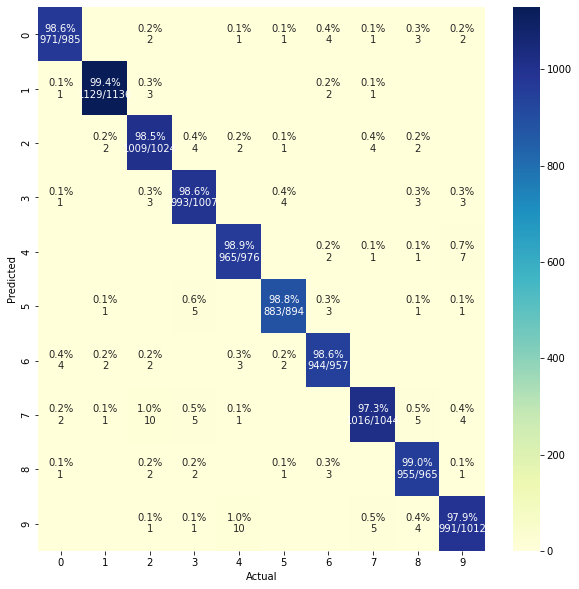

In [9]:
plot_confusion_matrix(prediction, expectation)


# Mismatches

The following items did not match the expectation.

In [10]:
missmatch = comparison[comparison.prediction != comparison.actual]
missmatch

,actual,prediction
115,4,9
211,5,3
247,4,2
321,2,7
340,5,3
...,...,...
9792,4,9
9839,2,7
9904,2,8
9975,3,2


Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


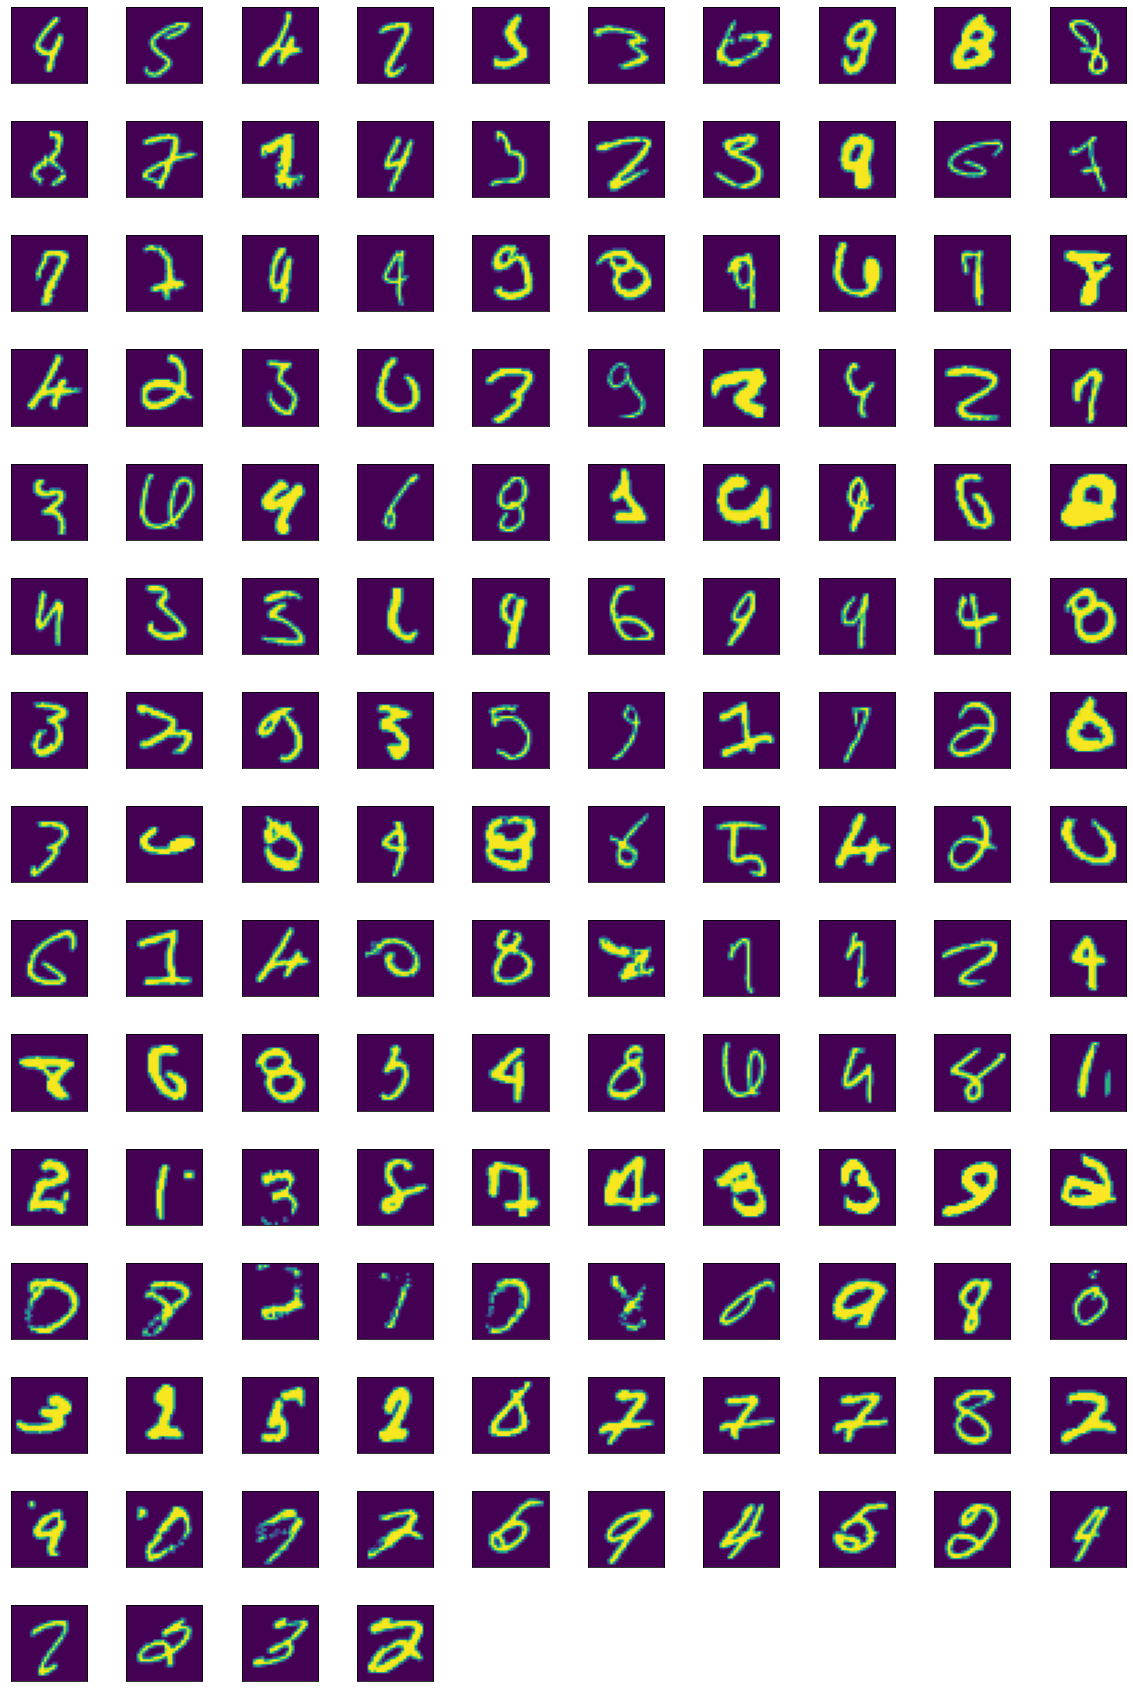

In [11]:
display_dataframe(x_test[missmatch.index], cols=10)

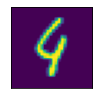

In [12]:
display_dataframe(x_test[[115]])